# Chameleons
In einem Zoo leben sieben Chamäleons in einem grossen Terrarium. Und zwar zwei rote, vier gelbe und ein violettes.
Diese Chamäleons haben eine spezielle Eigenschaft: Immer, wenn sich zwei Chamäleons verschiedener Farbe begegnen, nehmen beide die dritte Farbe an.
Wenn sich also ein rotes und ein gelbes Chamäleon begegnen, werden beide violett.

Frage: Kann es passieren, dass irgendwann alle Chamäleons die gleiche Farbe haben?

- Nein, das kann nicht passieren.
- Ja, das kann sein. Alle Chamäleons werden rot.
- Ja, das kann sein. Alle Chamäleons werden gelb.
- Ja, das kann sein. Alle Chamäleons werden violett.

## Mapping to Graph
The above question is represented as graph and solved with `networkx`

*States are Nodes* and are represented as tripples $(\#red, \#yellow, \#purple)$ e.g. $(2, 4, 1)$

*Dynamics generates Edges*
On tripples with all entries nonzero, transitions to another state are possible by adding $(-1, -1, 2)$ or a permutation thereof.
In tripples with one zero entry only one transition is possible, e.g. $(3, 0, 4) + (-1, 2, -1) \mapsto (2, 2, 3)$.
Tripples with two zeros are nonochrome and have no transitions

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


def build_graph(n_cham):
    "Build a DiGrapf for n_cham chameleons"
    graph = nx.DiGraph()
    
    # nodes:
    graph.add_nodes_from((i, j, n_cham-i-j) for i in range(n_cham+1) for j in range(n_cham+1-i))
    # edges:
    for i, j, k in graph.nodes:
        if i > 0 and j > 0:
            graph.add_edge((i,j,k), (i-1,j-1,k+2))
        if i > 0 and k > 0:
            graph.add_edge((i,j,k), (i-1,j+2,k-1))
        if j > 0 and k > 0:
            graph.add_edge((i,j,k), (i+2,j-1,k-1))
    return graph


def draw_cham(graph, init=None, ax=None):
    "Draw the chameleon dynamics graph"
    pos = nx.spring_layout(graph.to_undirected(), seed=99)
    options = {'node_size': 20}

    i, j, k = list(graph.nodes)[0]
    n_cham = i + j + k

    # nodes:
    #nx.draw_networkx_nodes(graph, pos, **options)
    for i,j in [
        ((n_cham,0,0), 'red'),
        ((0,n_cham,0), 'yellow'),
        ((0,0,n_cham), 'purple')
        ]:
        nx.draw_networkx_nodes(graph, pos, nodelist=[i], node_color=j, edgecolors='black', ax=ax, **options)

    # edges:
    nx.draw_networkx_edges(graph.to_undirected(), pos, ax=ax)

    if init:
        nx.draw_networkx_nodes(graph, pos, nodelist=[init], node_color='black', ax=ax, **options)



## Example: All 7 cameleons turn red and no other color is possible

There are three connected components, one for each color. `init7` lies in the red component.

Symmetry under permutations is clearly visible. Permutation $(1\ 2\ 3)$ leads to the ther components and  $(1\ 2)$ etc. to the cluster internal symmetry. Still looking for a symmetry aware layout...

3

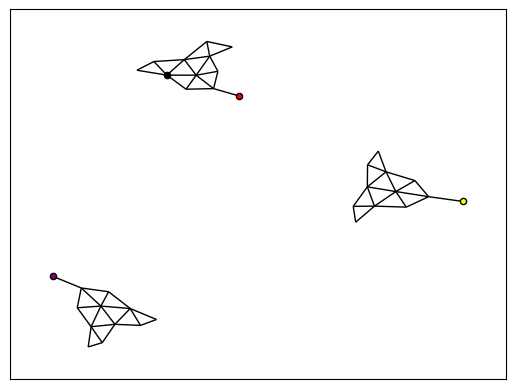

In [2]:
n_cham = 7
init7 = (2,4,1)

graph7 = build_graph(n_cham)
draw_cham(graph7, init7)

nx.number_weakly_connected_components(graph7)

## Graphical exploration for different `n_cham`

Observations based on first few:
  - There are always three components. Why?
  - For `n_cham` a multiple of three, all three monocolor nodes sit on the same component. Otherwise thes are on an isolated component. Why?

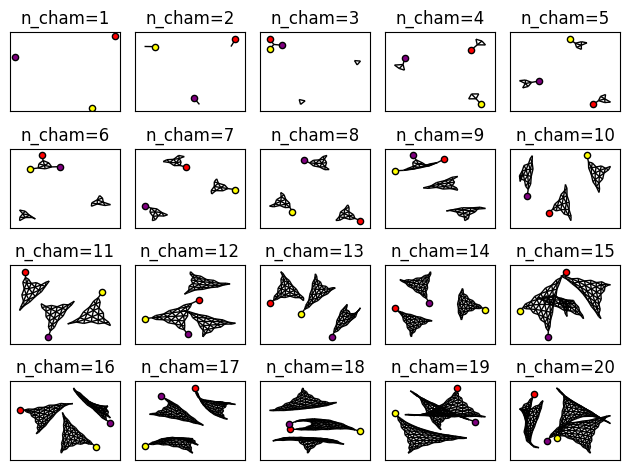

In [3]:
nrows = 4
ncols = 5

fig, axes = plt.subplots(nrows, ncols)
for n_cham, ax in zip(range(1, nrows*ncols+1), np.ravel(axes)):
    graph = build_graph(n_cham)
    draw_cham(graph, ax=ax)
    ax.set_title(f'n_cham={n_cham}')
fig.tight_layout()
plt.show()